This question should be answered using the Default Data Set (discussed in the class) and sklearn  framework.


**(a) Use the full data set to perform a logistic regression.  Compute the confusion matrix and overall fraction of correct predictions and print a summary. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression**

In [2]:
import pandas as pd

data = pd.read_csv('/content/Default.csv')
print(data)

from sklearn.preprocessing import LabelEncoder

data = data.drop(['Unnamed: 0'], axis=1)
print(data)

data['default'] = LabelEncoder().fit_transform(data['default'])
data['student'] = LabelEncoder().fit_transform(data['student'])
print(data)

      Unnamed: 0 default student      balance        income
0              1      No      No   729.526495  44361.625074
1              2      No     Yes   817.180407  12106.134700
2              3      No      No  1073.549164  31767.138947
3              4      No      No   529.250605  35704.493935
4              5      No      No   785.655883  38463.495879
...          ...     ...     ...          ...           ...
9995        9996      No      No   711.555020  52992.378914
9996        9997      No      No   757.962918  19660.721768
9997        9998      No      No   845.411989  58636.156984
9998        9999      No      No  1569.009053  36669.112365
9999       10000      No     Yes   200.922183  16862.952321

[10000 rows x 5 columns]
     default student      balance        income
0         No      No   729.526495  44361.625074
1         No     Yes   817.180407  12106.134700
2         No      No  1073.549164  31767.138947
3         No      No   529.250605  35704.493935
4         No  

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['balance', 'income']] = scaler.fit_transform(data[['balance', 'income']])
print(data)


      default  student   balance    income
0           0        0 -0.218835  0.813187
1           0        1 -0.037616 -1.605496
2           0        0  0.492410 -0.131212
3           0        0 -0.632893  0.164031
4           0        0 -0.102791  0.370915
...       ...      ...       ...       ...
9995        0        0 -0.255990  1.460366
9996        0        0 -0.160044 -1.039014
9997        0        0  0.020751  1.883565
9998        0        0  1.516742  0.236363
9999        0        1 -1.311691 -1.248805

[10000 rows x 4 columns]


Confusion Matrix: 
 [[1920   11]
 [  50   19]]


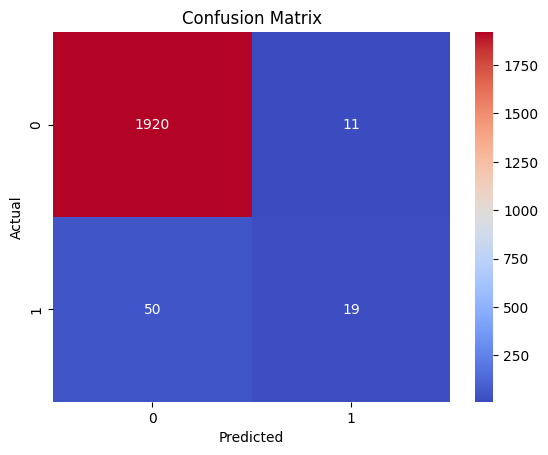

Accuracy:  0.9695
 Model Summary: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.63      0.28      0.38        69

    accuracy                           0.97      2000
   macro avg       0.80      0.63      0.68      2000
weighted avg       0.96      0.97      0.96      2000



In [4]:
X = data.drop(['default'], axis=1)
y = data['default']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

class_report = classification_report(y_test, y_pred)
print(" Model Summary: \n", class_report)

While the overall accuracy of the model to predict correctly is high, there are some mistakes in the model that can be inferred from the confusion matirx.

1. The number of true positives in less than the number of false negatives meaning that the sensitivity of the model is low. This shows that the model is not very good at identifying Defaulters as it is at identifying the Non-Defaulters.

2. The number of true postives is very similar to the number of false positives meaning that the precision of the model is close to 50%. This level of precision means that the prediction of the model is random when it comes to predicting Defaulters.

In conclusion, while this Logistic Regression model is good at identifing the Non-Defaulters, it is not good at predicting and identifying the Defauters.

**(b) Repeat (a) using LDA**

Confusion Matrix: 
 [[1925    6]
 [  58   11]]


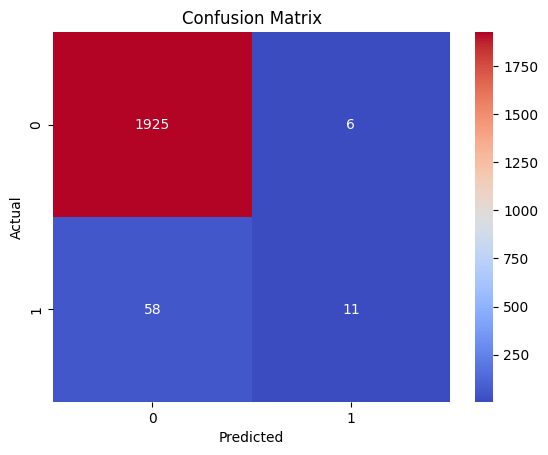

Accuracy:  0.968
 Model Summary: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.65      0.16      0.26        69

    accuracy                           0.97      2000
   macro avg       0.81      0.58      0.62      2000
weighted avg       0.96      0.97      0.96      2000



In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

class_report = classification_report(y_test, y_pred)
print(" Model Summary: \n", class_report)

This Linear Discriminant Analysis model is simlar to the previous Logistic Resgression model in terms of accuracy asa well as the confusion matrix.

While the overall accuracy of the model to predict correctly is high, there are some mistakes in the model that can be inferred from the confusion matirx.

1. The sensitivity of the model is lower than the Logistic Regression. This shows that the model is even worse at identifying Defaulters.

2. The precision of the model is is better than the Logistic Regression but still not significantly different. This makes this not very dependable when it comes to predicting Defaulters.

In conclusion, while this LDA model is good at identifing the Non-Defaulters, it is good at neither predicting nor identifying the Defauters.

**(c) Repeat (a) using QDA**

Confusion Matrix: 
 [[1922    9]
 [  56   13]]


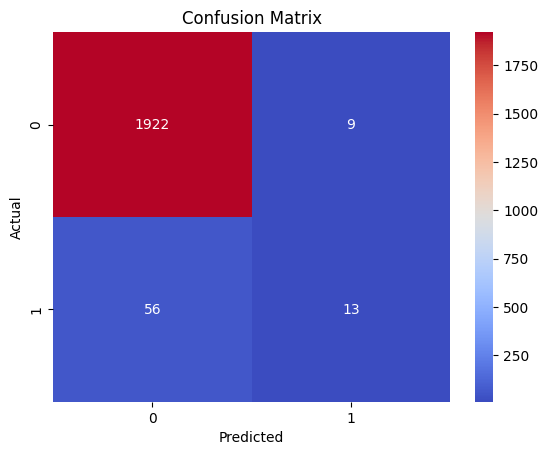

Accuracy:  0.9675
 Model Summary: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1931
           1       0.59      0.19      0.29        69

    accuracy                           0.97      2000
   macro avg       0.78      0.59      0.63      2000
weighted avg       0.96      0.97      0.96      2000



In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

class_report = classification_report(y_test, y_pred)
print(" Model Summary: \n", class_report)

This Quadratic Discriminant Analysis model is simlar to the previous Logistic Resgression and LDA models in terms of accuracy as well as the confusion matrix.

1. The sensitivity of the model is lower than the Logistic Regression but better than LDA model. Still this is very low meaning that the model is not very good at identifying Defaulters.

2. The precision of the model is is better than the Logistic Regression but worse than the LDA modle and still not significantly different enough to be dependable at predicting Defaulters.

In conclusion, while this QDA model is good at identifing the Non-Defaulters, it is not good at identifying and predicting the Defauters.

**(d) Repeat (a) using KNN with K = 1**

Confusion Matrix: 
 [[1883   48]
 [  43   26]]


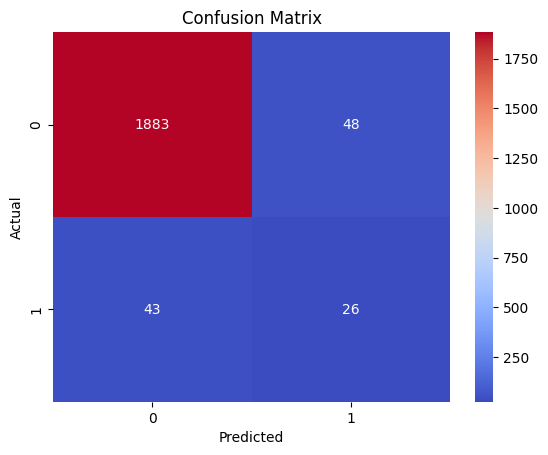

Accuracy:  0.9545
 Model Summary: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1931
           1       0.35      0.38      0.36        69

    accuracy                           0.95      2000
   macro avg       0.66      0.68      0.67      2000
weighted avg       0.96      0.95      0.96      2000



In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)


sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

class_report = classification_report(y_test, y_pred)
print(" Model Summary: \n", class_report)


While the overall accuracy of the model to predict correctly is still high, the K-NN(K=1) model is the worse yet at some mistakes than the other models.

1. The sensitivity of the model is best yet. But this is still very low meaning that the model is not very good at identifying Defaulters.

2. The precision of the model is the worst yet meaning that most of the model's predictions on the Defaulters is completely wrong.

In conclusion, while this K-NN (K=1) model is worst yet at identifying and predicting the Defauters.

**(e) Repeat (a) using Naive Bayes**

Confusion Matrix: 
 [[1914   17]
 [  56   13]]


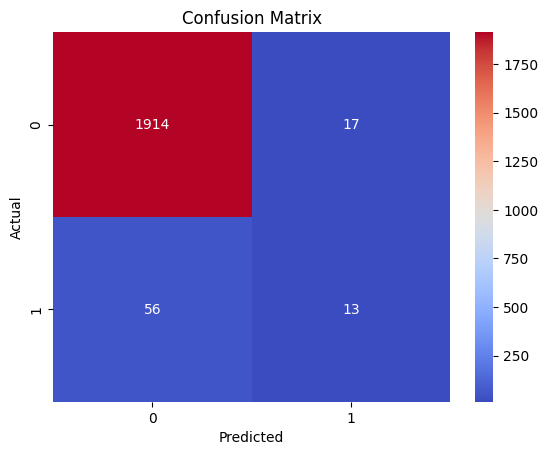

Accuracy:  0.9635
 Model Summary: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.43      0.19      0.26        69

    accuracy                           0.96      2000
   macro avg       0.70      0.59      0.62      2000
weighted avg       0.95      0.96      0.96      2000



In [8]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)


sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

class_report = classification_report(y_test, y_pred)
print(" Model Summary: \n", class_report)


This Naive Bayes model is simlar to the previous models in terms of accuracy as well as the confusion matrix.

1. The sensitivity of the model is lower than the Logistic Regression but better than LDA model. Still this is very low meaning that the model is not very good at identifying Defaulters.

2. The precision of the model is is better than the Logistic Regression but worse than the LDA modle and still not significantly different enough to be dependable at predicting Defaulters.

In conclusion, while this Naive Bayes model is good at identifing the Non-Defaulters, it is not good at identifying and predicting the Defauters.

**(f)Which of these methods appears to provide the best results on this data?**

 Based on the analysis of the confusion matrices and accuracy scores, the Logistic Regression model appears to provide the best results on this data.

 While all models have decent accuracy, the Logistic Regression model has a relatively higher precision and recall for the default class.


 However, it's important to consider that all models are struggling to effectively identify defaulters, as indicated by the low sensitivity.

 The choice of the "best" model depends on the specific goals and priorities of the application.

 If the primary goal is to minimize false positives (i.e., incorrectly predicting a default), then the Logistic Regression model might be the most appropriate.


 However, if the goal is to identify as many true positives (i.e., correctly predicting a default) as possible, then more work needs to be done to improve the model's sensitivity.


 In conclusion, while the Logistic Regression model seems to be performing slightly better than the other models, further improvements may be necessary to achieve an acceptable level of accuracy in predicting defaults.